In [2]:
import pandas as pd

In [ ]:
data= pd.read_excel(r"data/Flight Fare.xlsx")  

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [6]:
data.drop("Additional_Info", axis = 1, inplace = True)

In [7]:
data.drop("Route", axis = 1 , inplace = True)

In [8]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


In [10]:
data.shape

(10683, 9)

In [11]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Price              False
dtype: bool

In [12]:
data[data["Total_Stops"].isnull() == True]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [13]:
data.dropna(inplace = True)

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [18]:
data["Journey_Month"] = pd.to_datetime(data["Date_of_Journey"]).dt.month
data["Journey_Day"] = pd.to_datetime(data["Date_of_Journey"]).dt.day
data["Journey_Year"] = pd.to_datetime(data["Date_of_Journey"]).dt.year

In [16]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,2019


In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
data["Journey_Year"].unique()

array([2019], dtype=int32)

In [21]:
data.drop(["Journey_Year", "Date_of_Journey"] , axis = 1 , inplace = True)

In [22]:
data.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1


In [23]:
data["Dep_Hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Minute"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [24]:
data["Arrival_Hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_Minute"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [25]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,16,50,21,35


In [26]:
data.drop(["Dep_Time", 'Arrival_Time'], axis = 1, inplace = True)

<Axes: ylabel='Airline'>

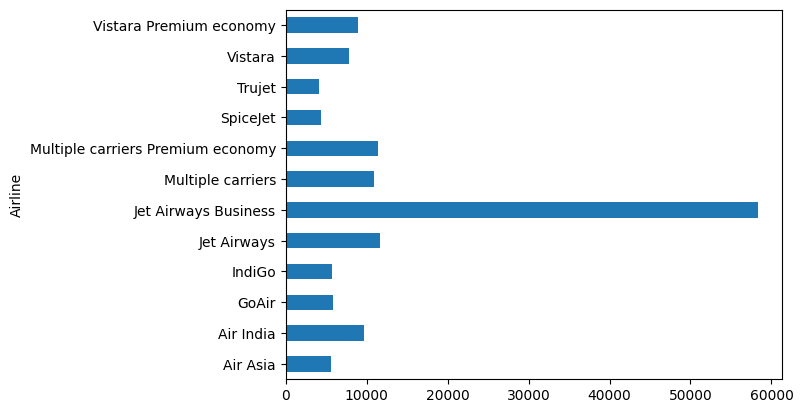

In [27]:
data.groupby("Airline")["Price"].mean().plot(kind = "barh")

In [28]:
#one-hot encoding
airline = pd.get_dummies(data["Airline"], dtype = int)
source = pd.get_dummies(data["Source"], dtype = int)
destination = pd.get_dummies(data["Destination"], dtype = int)

In [29]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15


In [30]:
source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [31]:
data = pd.concat([data , airline , source , destination] , axis = 1)

In [32]:
pd.set_option("display.max_columns", None)

In [33]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [34]:
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [35]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [36]:
data["Total_Stops"] = data["Total_Stops"].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'], [0,2,1,3,4])

In [37]:
data.head(10)

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,3,24,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,5,1,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,19h,2,13882,6,9,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,5h 25m,1,6218,5,12,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,4h 45m,1,13302,3,1,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,2h 25m,0,3873,6,24,9,0,11,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6,15h 30m,1,11087,3,12,18,55,10,25,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,21h 5m,1,22270,3,1,8,0,5,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,25h 30m,1,11087,3,12,8,55,10,25,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,7h 50m,1,8625,5,27,11,25,19,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [38]:
data["Duration_Hour"] = data["Duration"].str.split().str[0]
data["Duration_Minute"] = data["Duration"].str.split().str[1]

In [39]:
data.head(3)

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,2h 50m,0,3897,3,24,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2h,50m
1,7h 25m,2,7662,5,1,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7h,25m
2,19h,2,13882,6,9,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19h,NaN


In [40]:
data.drop("Duration", axis = 1, inplace = True)

In [41]:
data["Duration_Hour"] = data["Duration_Hour"].replace("[h]" , "", regex = True)
data["Duration_Minute"] = data["Duration_Minute"].replace("[m]" , "", regex = True)

In [42]:
data.fillna(0 , inplace = True)

In [43]:
data.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,0,3897,3,24,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,50
1,2,7662,5,1,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7,25
2,2,13882,6,9,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19,0
3,1,6218,5,12,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,25
4,1,13302,3,1,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,45


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   Journey_Month                      10682 non-null  int32 
 3   Journey_Day                        10682 non-null  int32 
 4   Dep_Hour                           10682 non-null  int32 
 5   Dep_Minute                         10682 non-null  int32 
 6   Arrival_Hour                       10682 non-null  int32 
 7   Arrival_Minute                     10682 non-null  int32 
 8   Air Asia                           10682 non-null  int64 
 9   Air India                          10682 non-null  int64 
 10  GoAir                              10682 non-null  int64 
 11  IndiGo                             10682 non-null  int64 
 12  Jet Airwa

In [45]:
data[data["Duration_Hour"] == "5m"]

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
6474,2,17327,3,6,16,50,16,55,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,5m,0


In [46]:
data["Duration_Hour"] = data["Duration_Hour"].replace("[m]" , "", regex = True)

In [47]:
data["Duration_Hour"] = data["Duration_Hour"].astype("int")
data["Duration_Minute"] = data["Duration_Minute"].astype("int")

In [48]:
#lets start with the model

In [49]:
data.head(2)

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,0,3897,3,24,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,50
1,2,7662,5,1,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7,25


In [50]:
x = data.drop("Price", axis = 1)
y = data["Price"]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8 , random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
model.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
model.score(x_train , y_train)

0.6240855209411221

In [56]:
model.score(x_test , y_test)

0.619591186700652

In [57]:
#Feature Selection  

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [59]:
model.fit(x,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


<Axes: >

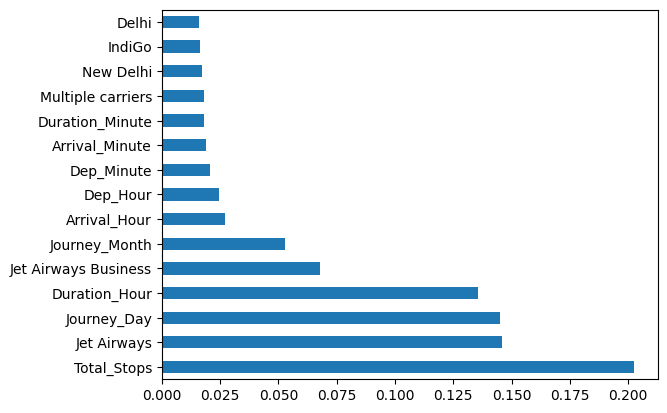

In [60]:
a = pd.Series(model.feature_importances_ , index = x.columns)
a.nlargest(15).plot(kind = "barh")

In [61]:
x

,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minute
0,0,3,24,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,50
1,2,5,1,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7,25
2,2,6,9,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19,0
3,1,5,12,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,25
4,1,3,1,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,19,55,22,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,30
10679,0,4,27,20,45,23,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,35
10680,0,4,27,8,20,11,20,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,0
10681,0,3,1,11,30,14,10,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,2,40


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [63]:
all_model = [DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor]

for i in all_model:
    model = i()
    model = model.fit(x_train,y_train)
    print(i , 'accuracy',model.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.7321931652813192
<class 'sklearn.svm._classes.SVR'> accuracy -0.000537796903632648
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.7984106107459947
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.5789568219725454
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.3322105290019257


In [64]:
# Random Forest Regressor is performing well

In [65]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
y_pred = reg_rf.predict(x_test)

In [67]:
reg_rf.score(x_train, y_train)

0.9532028572403113

In [68]:
reg_rf.score(x_test, y_test)

0.797269386794481

In [69]:
# Model Evaluation

In [70]:
from sklearn.metrics import mean_squared_error,r2_score

In [71]:
mean_squared_error(y_test, y_pred)

4371288.900569257

In [72]:
r2_score(y_test, y_pred)

0.797269386794481